# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
"""
Steering angle prediction model
"""

#importing some useful packages

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
from PIL import Image
import keras
import math
import random
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD, Adam, RMSprop
from scipy.misc.pilutil import imresize
from sklearn.utils import shuffle
import cv2

import os
import argparse
import json
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda, ELU, MaxPooling2D
from keras.layers.convolutional import Convolution2D
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
import csv
import cv2
import numpy as np

lines = []
with open('examples/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    #next(reader, None)
    for line in reader:
        lines.append(line)

imagesC = []
imagesL = []
imagesR = []
measurements = []
i = 0;
for line in lines:
    source_path = line[0]
    filenameC = source_path.split('/')[-1]
    current_path = 'examples/IMG/' + filenameC
    imageC = cv2.imread(current_path)
    imagesC.append(imageC)
    source_pathL = line[1]
    filenameL = source_pathL.split('/')[-1]
    current_path = 'examples/IMG/' + filenameL
    imageL = cv2.imread(current_path)
    imagesL.append(imageL)
    source_pathR = line[2]
    filenameR = source_pathR.split('/')[-1]
    current_path = 'examples/IMG/' + filenameR
    imageR = cv2.imread(current_path)
    imagesR.append(imageR)
    measurement = float(line[3])
    measurements.append(measurement)


AttributeError: 'list' object has no attribute 'shape'

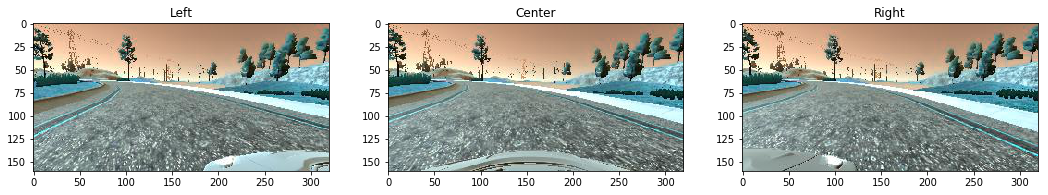

In [3]:
import matplotlib.pyplot as plt

imageC0 = imagesC[0]
imageL0 = imagesL[0]
imageR0 = imagesR[0]

plt.figure(figsize=(18,6))
plt.subplot(131)
plt.title('Left')
plt.imshow(imageL0)
plt.subplot(132)
plt.title('Center')
plt.imshow(imageC0)
plt.subplot(133)
plt.title('Right')
plt.imshow(imageR0)

(75, 320, 3)

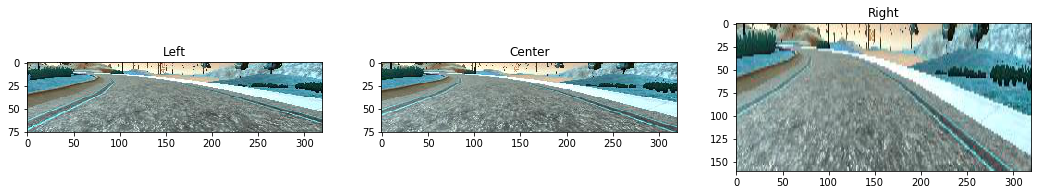

In [4]:
crop_start = 50
crop_end = 125
crop_imageL0 = imageL0[crop_start:crop_end, :]
crop_imageC0 = imageC0[crop_start:crop_end, :]
crop_imageR0 = imageR0[crop_start:crop_end, :]
crop_imageR0 = cv2.resize(crop_imageR0, (320, 160), interpolation = cv2.INTER_LINEAR)
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.title('Left')
plt.imshow(crop_imageL0)
plt.subplot(132)
plt.title('Center')
plt.imshow(crop_imageC0)
plt.subplot(133)
plt.title('Right')
plt.imshow(crop_imageR0)
crop_imageL0.shape

In [5]:
def crop_norm_image(img):
    cstart = 50
    cend = 125
    cimg = img[cstart:cend,:]
    cimg = cv2.resize(cimg, (320,160), interpolation = cv2.INTER_LINEAR)
    return cimg

In [6]:
# Make the model and run it.

In [7]:

X_t = []
X_train = []
for im in imagesC:
    cimg = crop_norm_image(im)
    X_t.append(cimg)
X_train = np.array(X_t)
y_train = np.array(measurements)

#Make the model
model = Sequential()
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160, 320, 3)))
#model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(75, 320, 3)))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=5)

model.save('model.h5')

Train on 1187 samples, validate on 297 samples
Epoch 1/5
1187/1187 [==============================] - 1s - loss: 5.2206 - val_loss: 4.3922
Epoch 2/5
1187/1187 [==============================] - 1s - loss: 5.0925 - val_loss: 9.1953
Epoch 3/5
1187/1187 [==============================] - 1s - loss: 6.5639 - val_loss: 2.3750
Epoch 4/5
1187/1187 [==============================] - 1s - loss: 5.2694 - val_loss: 2.0665
Epoch 5/5
1187/1187 [==============================] - 1s - loss: 4.4980 - val_loss: 5.2792


#Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas